In [1]:
#import libraries
import pandas as pd
import openpyxl
import numpy as np 

%matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv("D:\GIVA\orgdata.csv", encoding='unicode_escape')

In [3]:
df.head()

,ï»¿Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,1-Sep-21,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,3.43%
1,2-Sep-21,"9,327",617,"2,364","5,725",25.35%,"15,858",5068,31.96%,1313,8.28%,25.91%,521,3.29%
2,3-Sep-21,"10,415",786,"1,552","6,222",14.90%,"15,832",4669,29.49%,1214,7.67%,26.00%,311,1.96%
3,4-Sep-21,"12,312",765,"2,736","6,258",22.22%,"17,144",5023,29.30%,1328,7.75%,26.44%,435,2.54%
4,5-Sep-21,"15,719",944,"3,288","5,532",20.92%,"18,753",4599,24.52%,1393,7.43%,30.29%,438,2.34%


In [4]:
df.tail()

,ï»¿Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
107,17-Dec-21,"18,208","1,703","4,573","10,813",25.12%,"37,544",10308,27.46%,2934,7.81%,28.46%,772,2.06%
108,18-Dec-21,"15,839","1,586","3,612","11,520",22.80%,"29,238",11095,37.95%,2976,10.18%,26.82%,784,2.68%
109,19-Dec-21,"20,939","1,643","4,349","10,290",20.77%,"32,057",9182,28.64%,2374,7.41%,25.85%,588,1.83%
110,20-Dec-21,"18,982","1,711","3,027","10,297",15.95%,"35,508",9399,26.47%,3202,9.02%,34.07%,783,2.21%
111,21-Dec-21,"17,206","1,541","7,560","10,863",43.94%,"34,707",10183,29.34%,3434,9.89%,33.72%,663,1.91%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ï»¿Date                112 non-null    object
 1   New Installs           112 non-null    object
 2   Returning Users        112 non-null    object
 3   Uninstalls             112 non-null    object
 4   Net new installs       112 non-null    object
 5   Uninstall rate         112 non-null    object
 6   DAU                    112 non-null    object
 7   Unique Page Views      112 non-null    int64 
 8   Page view conversion   112 non-null    object
 9   Add to Cart            112 non-null    int64 
 10  A2C Conv               112 non-null    object
 11  AddtoCart (Prod page)  112 non-null    object
 12  Order Comp             112 non-null    int64 
 13  Overall Conv           112 non-null    object
dtypes: int64(3), object(11)
memory usage: 12.4+ KB


In [6]:
df.columns

Index(['ï»¿Date', 'New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
       'Page view conversion', 'Add to Cart', 'A2C Conv',
       'AddtoCart (Prod page)', 'Order Comp', 'Overall Conv'],
      dtype='object')

In [8]:
df=df.rename(columns={'ï»¿Date':'Date'})

In [9]:
df.head(1)

,Date,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
0,1-Sep-21,"6,012",715,"2,538","4,738",42.22%,"13,421",4098,30.53%,1316,9.81%,32.11%,460,3.43%


In [10]:
df1=df

In [11]:
#Convert the date object into datetime dtype
df1['Date'] = pd.to_datetime(df1['Date'])

In [16]:
# Assuming your DataFrame is named 'data' and the column you want to convert is 'column_name'
df1['Overall Conv'] = df1['Overall Conv'].str.replace('%', '').astype(float)


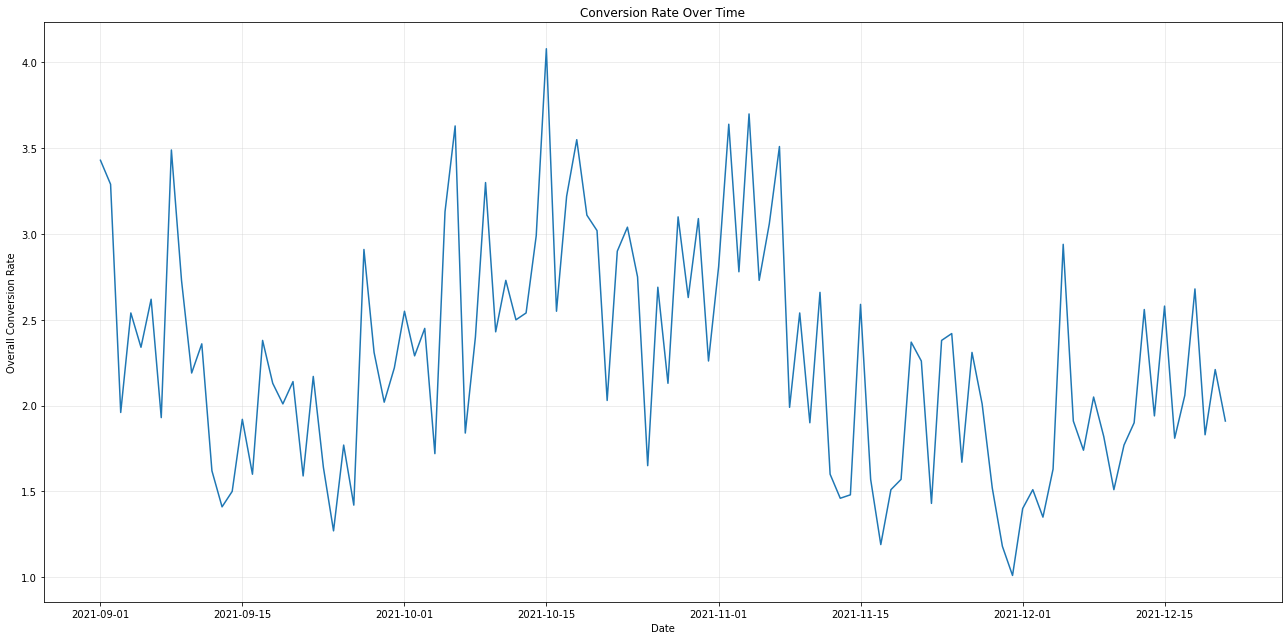

In [19]:
plt.figure(figsize=(18, 9))
plt.plot(df1['Date'], df1['Overall Conv'])
plt.xlabel('Date')
plt.ylabel('Overall Conversion Rate')
plt.title('Conversion Rate Over Time')

plt.tight_layout()
plt.grid(color='lightgray', alpha=0.5, zorder=1)
plt.show()


In [21]:
# Perform seasonal decomposition
seasonal_period = 26
stl = STL(df1['Overall Conv'], seasonal=seasonal_period)
decomposed = stl.fit()

# Plot the decomposition components
fig, ax = plt.subplots(4, 1, figsize=(8, 10),dpi=120)
ax[0].plot(decomposed.trend)
ax[0].set_ylabel('Trend')
ax[1].plot(decomposed.seasonal)
ax[1].set_ylabel('Seasonal')
ax[2].plot(decomposed.resid)
ax[2].set_ylabel('Residual')
ax[3].plot(decomposed.observed)
ax[3].set_ylabel('Observed')
plt.tight_layout()
plt.show()


ValueError: Unable to determine period from endog

<AxesSubplot:title={'center':'Biweekly Seasonal Component'}, xlabel='Date', ylabel='Seasonal Component'>

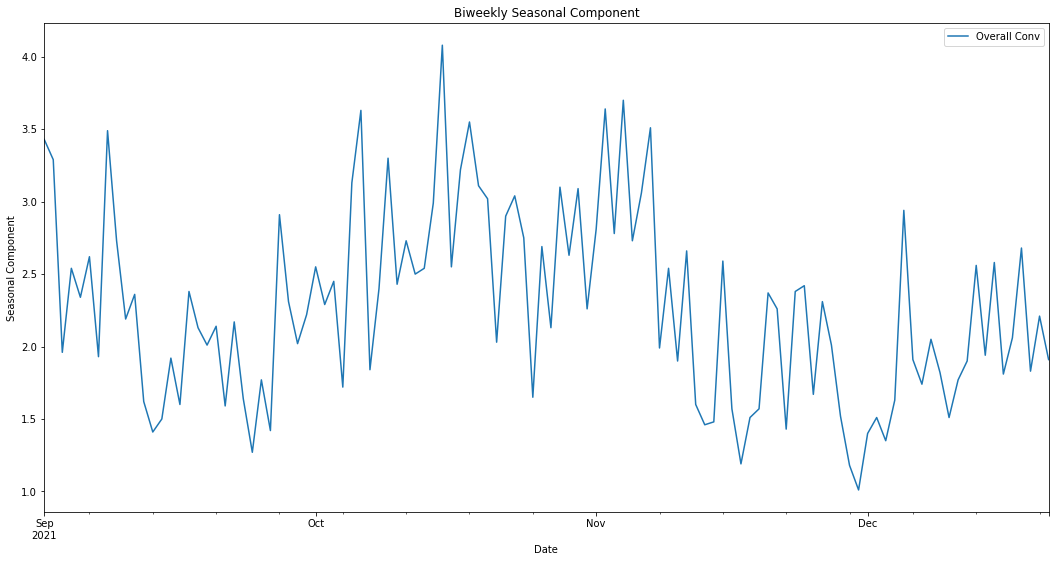

In [22]:



seasonal_period = 14  # Set the seasonal period manually (14 days for biweekly)

# Calculate the rolling mean or median with the specified seasonal period
df1['seasonal_component'] = df1['Overall Conv'].rolling(window=seasonal_period, min_periods=1, center=True).mean()

# Plot the seasonal component
df1.plot(x='Date', y='Overall Conv', figsize=(18, 9), xlabel='Date', ylabel='Seasonal Component', title='Biweekly Seasonal Component')


In [23]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

In [24]:
df2=df1

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   112 non-null    datetime64[ns]
 1   New Installs           112 non-null    object        
 2   Returning Users        112 non-null    object        
 3   Uninstalls             112 non-null    object        
 4   Net new installs       112 non-null    object        
 5   Uninstall rate         112 non-null    object        
 6   DAU                    112 non-null    object        
 7   Unique Page Views      112 non-null    int64         
 8   Page view conversion   112 non-null    object        
 9   Add to Cart            112 non-null    int64         
 10  A2C Conv               112 non-null    object        
 11  AddtoCart (Prod page)  112 non-null    object        
 12  Order Comp             112 non-null    int64         
 13  Overa

In [26]:
df2=df2.set_index('Date')

In [27]:
color_pal=sns.color_palette()

<AxesSubplot:title={'center':'Conversion Rate over time'}, xlabel='Date'>

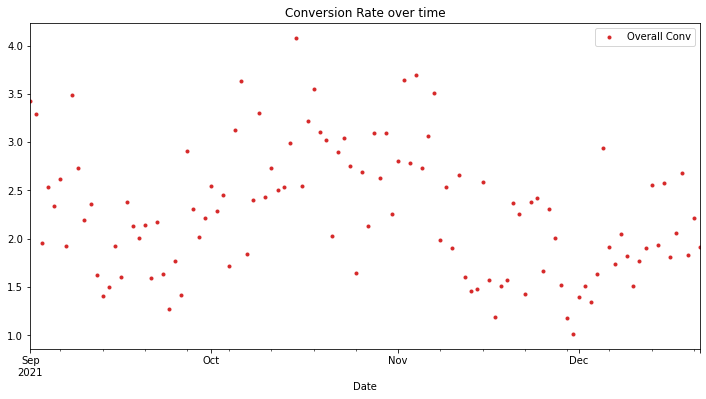

In [33]:
df2.plot(y='Overall Conv', style='.', color=color_pal[3], figsize=(12, 6), title='Conversion Rate over time')


#### Moving Average

In [38]:
train = df2.loc[df2.index<'2021-12-05']
test =  df2.loc[df2.index>='2021-12-05']

In [35]:
df2.index

DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='Date', length=112, freq=None)

<AxesSubplot:title={'center':'Moving Average Analysis'}, xlabel='Date', ylabel='Moving Average'>

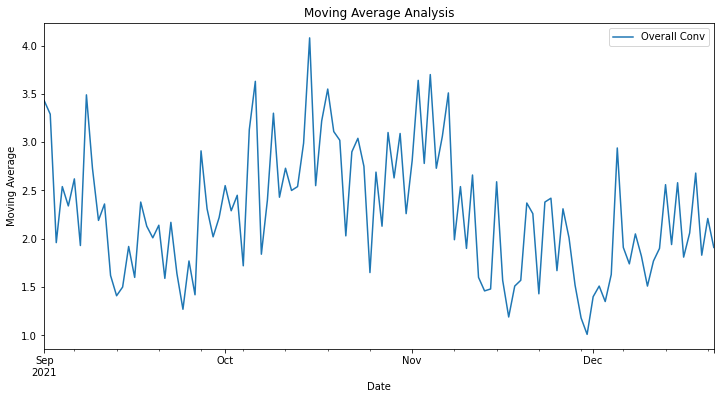

In [40]:
window_size = 7  # Set the window size for the moving average

# Calculate the moving average
df1['moving_average'] = df1['Overall Conv'].rolling(window=window_size, min_periods=1, center=True).mean()

# Plot the moving average
df1.plot(x='Date', y='Overall Conv', figsize=(12, 6), xlabel='Date', ylabel='Moving Average', title='Moving Average Analysis')

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   112 non-null    datetime64[ns]
 1   New Installs           112 non-null    object        
 2   Returning Users        112 non-null    object        
 3   Uninstalls             112 non-null    object        
 4   Net new installs       112 non-null    object        
 5   Uninstall rate         112 non-null    object        
 6   DAU                    112 non-null    object        
 7   Unique Page Views      112 non-null    int64         
 8   Page view conversion   112 non-null    object        
 9   Add to Cart            112 non-null    int64         
 10  A2C Conv               112 non-null    object        
 11  AddtoCart (Prod page)  112 non-null    object        
 12  Order Comp             112 non-null    int64         
 13  Overa

In [44]:
df.columns

Index(['Date', 'New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
       'Page view conversion', 'Add to Cart', 'A2C Conv',
       'AddtoCart (Prod page)', 'Order Comp', 'Overall Conv',
       'seasonal_component', 'moving_average'],
      dtype='object')

In [48]:
df['New Installs '] = df['New Installs '].str.replace(',', '').astype('int64')

In [50]:
df['Returning Users ']=df['Returning Users '].str.replace(',', '').astype('int64')

In [51]:
df['Uninstalls ']=df['Uninstalls '].str.replace(',', '').astype('int64')

In [52]:
df['Net new installs ']=df['Net new installs '].str.replace(',', '').astype('int64')

In [53]:
df['DAU ']=df['DAU '].str.replace(',', '').astype('int64')

In [56]:
columns_to_convert = ['Uninstall rate','AddtoCart (Prod page)', 'A2C Conv', 'Page view conversion']

In [59]:
df['Uninstall rate']=df['Uninstall rate'].str.replace('%', '').astype('float64')

In [60]:
df['AddtoCart (Prod page)']=df['AddtoCart (Prod page)'].str.replace('%', '').astype('float64')

In [61]:
df['A2C Conv']=df['A2C Conv'].str.replace('%', '').astype('float64')

In [62]:
df['Page view conversion']=df['Page view conversion'].str.replace('%', '').astype('float64')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   112 non-null    datetime64[ns]
 1   New Installs           112 non-null    int64         
 2   Returning Users        112 non-null    int64         
 3   Uninstalls             112 non-null    int64         
 4   Net new installs       112 non-null    int64         
 5   Uninstall rate         112 non-null    float64       
 6   DAU                    112 non-null    int64         
 7   Unique Page Views      112 non-null    int64         
 8   Page view conversion   112 non-null    float64       
 9   Add to Cart            112 non-null    int64         
 10  A2C Conv               112 non-null    float64       
 11  AddtoCart (Prod page)  112 non-null    float64       
 12  Order Comp             112 non-null    int64         
 13  Overa

In [64]:
data=df

In [66]:
data=data.set_index('Date')

In [71]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [67]:
train = data.loc[df2.index<'2021-12-05']
test =  data.loc[df2.index>='2021-12-05']

In [72]:
# Select the relevant features for analysis
X_train = train[['New Installs ', 'Returning Users ', 'Uninstalls ',
       'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
       'Page view conversion', 'Add to Cart', 'A2C Conv',
       'AddtoCart (Prod page)', 'Order Comp' ]]
y_train = train['Overall Conv']

# Fit a multivariate regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Obtain the coefficients and other relevant information from the model
coefficients = model.coef_
intercept = model.intercept_


In [69]:
data.index ## Check

DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='Date', length=112, freq=None)

In [74]:
coefficients

array([-9.95061190e-06,  8.32216330e-05,  2.39669822e-05, -2.13056746e-05,
       -2.38324178e-03,  1.61474243e-05, -3.03822577e-04,  6.58280074e-02,
       -4.94738144e-04,  1.07791899e-01, -3.48970326e-03,  4.70299882e-03])

In [75]:
from sklearn.metrics import r2_score

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate R-squared value
r2 = r2_score(y_train, y_train_pred)

print("R-squared:", r2)


R-squared: 0.9592278704587042


In [77]:
X_test = test[['New Installs ', 'Returning Users ', 'Uninstalls ',
               'Net new installs ', 'Uninstall rate', 'DAU ', 'Unique Page Views',
               'Page view conversion', 'Add to Cart', 'A2C Conv',
               'AddtoCart (Prod page)', 'Order Comp']]

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Create a DataFrame to display the actual and predicted values
results_df = test[['Overall Conv']].copy()
results_df['Predicted Overall Conv'] = y_test_pred

print(results_df)

            Overall Conv  Predicted Overall Conv
Date                                            
2021-12-05          2.94                3.110839
2021-12-06          1.91                1.831364
2021-12-07          1.74                1.423559
2021-12-08          2.05                2.084054
2021-12-09          1.82                1.839220
2021-12-10          1.51                1.228947
2021-12-11          1.77                1.448696
2021-12-12          1.90                1.971337
2021-12-13          2.56                2.857112
2021-12-14          1.94                1.624398
2021-12-15          2.58                2.474416
2021-12-16          1.81                1.291498
2021-12-17          2.06                1.898458
2021-12-18          2.68                2.493882
2021-12-19          1.83                1.591304
2021-12-20          2.21                2.095340
2021-12-21          1.91                1.482398


In [78]:
results_df.to_csv('TS_LinearReg.csv')